<a href="https://colab.research.google.com/github/isharavani840/Basicjavaprojects/blob/main/CAMPUS_PLACEMENT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This campus placement prediction model project aims to predict the probability that students will receive job offers through on-campus recruitment. Using machine learning algorithms, this model analyzes various factors like academic performance in class 10th, class 12th, graduation percentage and many more. The project includes data collection, pre-processing and exploratory data analysis to understand key predictors of placement success. Machine learning models, including logistic regression, SVM, KNeighbours, Decision Tree, Random Forest, GradientBoosting are trained and evaluated to identify the most accurate and reliable predictors. The final model helps predict the placement status of students, whether they will be placed or not.

In [ ]:
!pip install pandas


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Placement.csv')

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
#Display last 5 rows of dataset

In [ ]:
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [ ]:
#3-Finding shape of dataset(No of rows and cols)

In [ ]:
data.shape

(215, 15)

In [ ]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 215
Number of Columns 15


In [ ]:
#Get information about our dataset like the total no of rows, total no of cols, datatypes of each col and memory requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [ ]:
#5-- check null values in the dataset

In [ ]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
#6--Get ovarall statistics About the dataset

In [ ]:
data.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
#7--EDA

In [ ]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
#How many students got placed

In [ ]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [ ]:
data['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [ ]:
#Could you display top 5 sci&tech students placed according to their salary?

In [ ]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
data[(data['degree_t']=="Sci&Tech") & (data['status']=="Placed")].sort_values(by="salary", ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,0,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,0,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,0,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,0,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,0,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [ ]:
#8-- Data preprocessing

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data = data.drop(['sl_no','salary'],axis=1)

In [ ]:
data.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed


In [ ]:
#Encoding the categorical columns

In [ ]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [ ]:
data['ssc_b'] = data['ssc_b'].map({'Central':1,'Others':0})

In [ ]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [ ]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [ ]:
data['hsc_b'] = data['hsc_b'].map({'Central':1,'Others':0})

In [ ]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [ ]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [ ]:
data['hsc_s'] = data['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0})

In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [ ]:
data['degree_t'] = data['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [ ]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed


In [ ]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [ ]:
data['specialisation'] = data['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [ ]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,0,66.28,Placed


In [ ]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['workex'] = data['workex'].map({'Yes':1,'No':0})

In [ ]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,Placed


In [ ]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [ ]:
data['status'] = data['status'].map({'Placed':1,'Not Placed':0})

In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


In [ ]:
#9--Store Feature Matrix in X and Response(Target) in Vector y

In [ ]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [ ]:
x = data.drop('status',axis=1)
y = data['status']

In [ ]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [ ]:
#10--Splitting the dataset into the training set and test set

In [ ]:
!pip install scikit-learn


In [ ]:
import sys
print(sys.executable)


/usr/bin/python3


In [ ]:
!{sys.executable} -m pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
print("scikit-learn imported successfully.")


scikit-learn imported successfully.


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
#11--Import the models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#12--Model training

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean (you can use median or mode as well)
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Now train your model using x_train_imputed and y_train
lr = LogisticRegression()
lr.fit(x_train_imputed, y_train)


LogisticRegression()

In [ ]:
from sklearn.svm import SVC
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
svm = SVC()
svm.fit(x_train_imputed, y_train)


SVC()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
knn = KNeighborsClassifier()
knn.fit(x_train_imputed, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train_imputed, y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train_imputed, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Option 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(x_train_imputed, y_train)


GradientBoostingClassifier()

In [ ]:
#13--Prediction on Test Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Instantiate the logistic regression model
lr =  LogisticRegression()

# Fit the logistic regression model on the training data
lr.fit(x_train_imputed, y_train)

# Make predictions using the trained model and the imputed test data
y_pred1 = lr.predict(x_test_imputed)


In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Instantiate the logistic regression model
svm = SVC()

# Fit the logistic regression model on the training data
svm.fit(x_train_imputed, y_train)

# Make predictions using the trained model and the imputed test data
y_pred2 = lr.predict(x_test_imputed)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Instantiate the logistic regression model
knn = KNeighborsClassifier()

# Fit the logistic regression model on the training data
knn.fit(x_train_imputed, y_train)

# Make predictions using the trained model and the imputed test data
y_pred3 = lr.predict(x_test_imputed)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Instantiate the logistic regression model
dt = DecisionTreeClassifier()

# Fit the logistic regression model on the training data
dt.fit(x_train_imputed, y_train)

# Make predictions using the trained model and the imputed test data
y_pred4 = lr.predict(x_test_imputed)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Instantiate the logistic regression model
rf = RandomForestClassifier()

# Fit the logistic regression model on the training data
rf.fit(x_train_imputed, y_train)

# Make predictions using the trained model and the imputed test data
y_pred5 = lr.predict(x_test_imputed)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Instantiate the logistic regression model
gb = GradientBoostingClassifier()

# Fit the logistic regression model on the training data
gb.fit(x_train_imputed, y_train)

# Make predictions using the trained model and the imputed test data
y_pred6 = lr.predict(x_test_imputed)

In [ ]:
#14--Evaluting the algorithms

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score1 = accuracy_score(y_test,y_pred1)

In [ ]:
score2 = accuracy_score(y_test,y_pred2)

In [ ]:
score3 = accuracy_score(y_test,y_pred3)

In [ ]:
score4 = accuracy_score(y_test,y_pred4)

In [ ]:
score5 = accuracy_score(y_test,y_pred5)

In [ ]:
score6 = accuracy_score(y_test,y_pred6)

In [ ]:
print(score1,score2,score3,score4,score5,score6)

0.8837209302325582 0.8837209302325582 0.8837209302325582 0.8837209302325582 0.8837209302325582 0.8837209302325582


In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
              'ACC':[score1*100,
                     score2*100,
                     score3*100,
                     score4*100,
                     score5*100,score6*100]})

In [ ]:
final_data

,Models,ACC
0,LR,88.372093
1,SVC,88.372093
2,KNN,88.372093
3,DT,88.372093
4,RF,88.372093
5,GB,88.372093


In [ ]:
!pip install seaborn


In [ ]:
import seaborn as sns


<Axes: xlabel='Models', ylabel='ACC'>

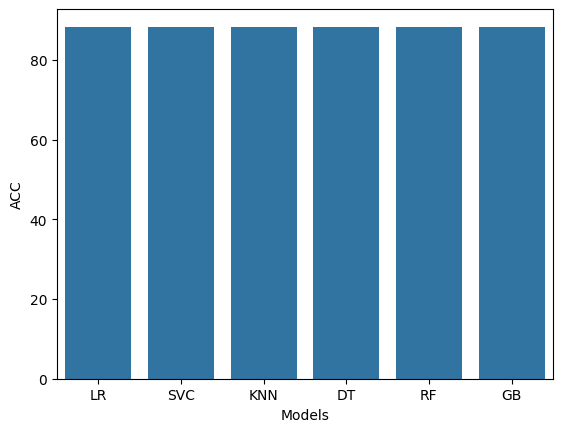

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


In [ ]:
#15--Prediction on new data

In [ ]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'estest_p':55.0,
    'specialisation':1,
    'mba_p':58.8,
  },index=[0])

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean (you can use median or mode as well)
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Now train your model using x_train_imputed and y_train
lr = LogisticRegression()
lr.fit(x_train_imputed, y_train)


LogisticRegression()

In [ ]:
p = lr.predict(new_data)



In [ ]:
prob = lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probablity of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probablity of 0.98


In [ ]:
prob

array([[0.02001354, 0.97998646]])

In [ ]:
#16--Save Model using Joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(lr,'model_campus_placement')

['model_campus_placement']

In [ ]:
model = joblib.load('model_campus_placement')

In [ ]:
model.predict(new_data)

array([1])

In [ ]:
#GUI

In [ ]:
!pip install ipywidgets scikit-learn joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00


In [ ]:
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
model = joblib.load('model_campus_placement')

In [ ]:
gender = widgets.Dropdown(
    options=['Male', 'Female'],
    description='Gender:'
)

In [ ]:
ssc_p = widgets.FloatText(
    description='SSC %:'
)


In [ ]:
ssc_b = widgets.Dropdown(
    options=['Central', 'Others'],
    description='SSC Board:'
)

In [ ]:
hsc_p = widgets.FloatText(
    description='HSC %:'
)

In [ ]:
hsc_b = widgets.Dropdown(
    options=['Central', 'Others'],
    description='HSC Board:'
)

In [ ]:
hsc_s = widgets.Dropdown(
    options=['Commerce', 'Science', 'Arts'],
    description='HSC Specialization:'
)

In [ ]:
degree_p = widgets.FloatText(
    description='Degree %:'
)

In [ ]:
degree_t = widgets.Dropdown(
    options=['Sci&Tech', 'Comm&Mgmt', 'Others'],
    description='Degree Type:'
)

In [ ]:
workex = widgets.Dropdown(
    options=['Yes', 'No'],
    description='Work Experience:'
)

In [ ]:
etest_p = widgets.FloatText(
    description='E-test %:'
)

In [ ]:
specialisation = widgets.Dropdown(
    options=['Mkt&Fin', 'Mkt&HR'],
    description='Specialisation:'
)

In [ ]:
mba_p = widgets.FloatText(
    description='MBA %:'
)

In [ ]:
def predict(_):
    # Collect inputs
    input_data = [
        1 if gender.value == 'Male' else 0,
        ssc_p.value,
        1 if ssc_b.value == 'Central' else 0,
        hsc_p.value,
        1 if hsc_b.value == 'Central' else 0,
        0 if hsc_s.value == 'Commerce' else (1 if hsc_s.value == 'Science' else 2),
        degree_p.value,
        0 if degree_t.value == 'Sci&Tech' else (1 if degree_t.value == 'Comm&Mgmt' else 2),
        1 if workex.value == 'Yes' else 0,
        etest_p.value,
        0 if specialisation.value == 'Mkt&Fin' else 1,
        mba_p.value
    ]

    # Reshape input data for the model
    input_data = [input_data]

    # Make prediction
    prediction = model.predict(input_data)

    # Display the prediction result
    with output:
        clear_output()
        if prediction[0] == 1:
            print("Prediction: Placed")
        else:
            print("Prediction: Not Placed")

# Create a button to trigger the prediction
button = widgets.Button(description='Predict')
button.on_click(predict)

# Output widget to display the prediction result
output = widgets.Output()

# Display the widgets
display(gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, button, output)

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

FloatText(value=0.0, description='SSC %:')

Dropdown(description='SSC Board:', options=('Central', 'Others'), value='Central')

FloatText(value=0.0, description='HSC %:')

Dropdown(description='HSC Board:', options=('Central', 'Others'), value='Central')

Dropdown(description='HSC Specialization:', options=('Commerce', 'Science', 'Arts'), value='Commerce')

FloatText(value=0.0, description='Degree %:')

Dropdown(description='Degree Type:', options=('Sci&Tech', 'Comm&Mgmt', 'Others'), value='Sci&Tech')

Dropdown(description='Work Experience:', options=('Yes', 'No'), value='Yes')

FloatText(value=0.0, description='E-test %:')

Dropdown(description='Specialisation:', options=('Mkt&Fin', 'Mkt&HR'), value='Mkt&Fin')

FloatText(value=0.0, description='MBA %:')

Button(description='Predict', style=ButtonStyle())

Output()